Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva

## Uvod u znanost o podacima 2021/2022
https://www.fer.unizg.hr/predmet/uuzop

------------------------------

### Early Predictor for Student Success Based on Behavioural and Demographical Indicators

*Verzija: 1.0
<br>
Zadnji put ažurirano: 7.12.2021.*

------------------------------

### Potporna pitanja
---

<b>1. Prokomentirati vrstu istraživanja u članku prema <b>svrsi</b>, <b>izvoru informacija</b>, <b>vremenu provedbe</b>, <b>načinu prikupljanja i vrsti korištenih podataka</b>, <b>stupnju manipulacije varijablama</b>, <b>dubini</b> i <b>vrsti zaključka</b>.</b>
<ul>
    <li>Ovo je primijenjeno istraživanje (prema <b>svrsi</b>) jer koristi poznatu teoriju (algoritme) pomoću koje stvara praktičko znanstveno znanje (može li se pomoću podataka predvidjeti rezultantna varijabla). </li>
    <li>Što se tiče <b>izvora informacija</b> ovo je sekundarno istraživanje jer koristi već dostupne podatke iz <i>OULAD</i>-a (<i>Open University Learning Analytics Dataset</i>).</li>
    <li>Po <b>vremenu provedbe</b> ovo se istraživanje može okarakterizirati kao studija presjeka ili sinkrono istraživanje. Podaci su statični, te se istražuje samo studentov konačan uspjeh. </li>
    <li><b>Način prikupljanja podataka</b> spada u dokumentarno istraživanje. Podaci su dobiveni iz već uspostavljenog izvora (<i>OULAD</i>) te se nad njima vrši daljnja analiza bez ikakvog dodavanja informacija s terena ili laboratorijskih uvjeta. </li>
    <li>Po <b>vrsti korištenih podataka</b> istraživanje se može klasificirati kao kvalitativno. Prikupljeni su razni nenumerički podaci (spol, raspon godina, razina obrazovanja i sl.) koji se onda moraju numerički evaluirati kako bi se mogle provesti statističke metode. </li>
    <li>Kada se u obzir uzme <b>stupanj manipulacije varijablama</b> jasno je da se ovo istraživanje može opisati kao promatračko istraživanje. Razlog tome je što se u istraživanju samo pokušava saznati kako razne neovisne varijable utječu na zavisnu varijablu, odnosno može li se zavisna varijabla predvidjeti na temelju nezavisnih. Ne vrši se nikakva manipulacija ili promjena vrijednosti neovisnih varijabli.</li>
     <li>Prema <b>dubini</b> ovo istraživanje spada u istraživačko (<i>exploratory</i>) istraživanje. Pokušava se identificirati kako točno razni eksterni faktori utječu na uspjeh studenta u online tečajevima - što je tema koja još nije detaljno istražena.</li>
     <li>Po <b>vrsti zaključka</b> ovo je istraživanje hipotetičko-induktivno. Analiziraju se dostupni podaci iz stvarnosti te se pokušava donijeti zaključak (može li se predvidjeti uspjeh polaznika na temelju eksternih značajki) i zatim se korištenjem nekoliko različitih modela taj zaključak provjera ili odbacuje.</li>
</ul>

<b>2. Prokomentirati metode kojima su prikupljeni podaci za članak</b>

Podaci su prikupljeni na način da je prilikom registracije svaki polaznik morao ispuniti formular koji je tražio podatke poput spola i starosti. Svaka interakcija polaznika (klik na stranici, predaja zadatka i sl.) su također zabilježeni te povezani sa svakim polaznikom preko njihovog jedinstvenog identifikatora. Također su pohranjeni i podaci o pojedinim zadatcima (rok predaje, vrsta zadatka i sl.) te podaci o samim tečajevima (godina, duljina trajanja i sl.).

<b>3. Provjeriti jesu li podaci prikupljeni i objavljeni prema pravilima istraživačke etike</b>

Prema svim dostupnim informacijama zaključujem da su se istraživači u ovom istraživanju držali svih pravila istraživačke etike. Podaci su anonimni, samo istraživanje je <i>peer review</i>-ed te (pretpostavljam) da su svi sudionici pristali na to da se njihovi podaci pohranjuju i javno su dostupni (prilikom registracije za polaganje tečajeva).

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h2><b> 1. Studenti po kategorijama</b></h2>

<ul>
    <li>Withdrawn: 10,156</li>
    <li>Fail: 7,052</li>
    <li>Pass: 12,361</li>
    <li>Distinction: 3,024</li>
</ul>

<AxesSubplot:>

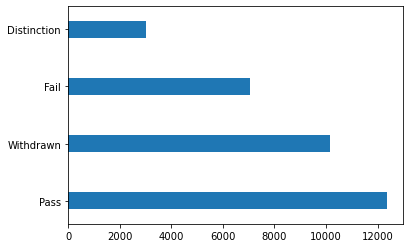

In [2]:
studentInfo = pd.read_csv('studentInfo.csv')
studentInfo.final_result.value_counts().plot.barh(width=0.3)

<h2><b>2. Informacije o <i>MOOC</i>-evima</b></h2>

<b>NAPOMENA: </b><i>1st assignment submission day</i> se razlikuje za BBB i DDD od onog u istraživačkom radu. Problem je u tome što nije jasno predstavljeno kako se točno odabrala vrijednost tog dana. U ovom radu, vrijednost tog dana je izabrana kao najmanja vrijednost datuma predaje zadatka za svaki <i>Course</i>.

In [3]:
# Jedinstveni 'course-ovi'
assessmentsInfo = pd.read_csv('assessments.csv')
assessmentsInfoCourses = pd.DataFrame(assessmentsInfo.code_module.unique().tolist(), columns=['code_module'])

# '1st assignment submission day'
assessmentsInfoTemp = assessmentsInfo.groupby(['code_module', 'code_presentation'], as_index=False).min('date').reindex(columns=['code_module', 'code_presentation', 'date', 'id_assessment'])
assessmentsInfo1st = assessmentsInfo.groupby('code_module', as_index=False).min('date').reindex(columns=['code_module','date'])
assessmentsInfo1st['date'] = 'Day ' + assessmentsInfo1st['date'].astype(int).astype(str)

# Id-evi prvih assignmenta
firstAssignmentIds = assessmentsInfoTemp['id_assessment'].tolist()

# 'Number of registered students'
studentInfoRegistered = studentInfo.groupby('code_module').size().reset_index(name='# of registered students')

# 'Year(run)'
coursesInfo = pd.read_csv('courses.csv')
coursesInfoUnique = coursesInfo.code_module.unique().tolist()

yearRun = dict()

for module in coursesInfoUnique:
    for module2, year in zip(coursesInfo.code_module, coursesInfo.code_presentation):
        if ((module in yearRun) and (module == module2)):
            yearRun[module].append(year)
        elif(module == module2):
            yearRun[module] = [year] 

for key in yearRun:
    for i in range(len(yearRun[key])):
        yearRun[key][i] = int(yearRun[key][i][:-1])
    yearRun[key] = set(yearRun[key])
    yearRun[key] = ' & '.join(str(e) for e in yearRun[key])

coursesInfoYearRun = pd.DataFrame.from_dict(yearRun, orient="index").reset_index(level=0)
coursesInfoYearRun.columns = ['code_module', 'Year(run)']

# Final MOOC table
temp1 = pd.merge(assessmentsInfoCourses, assessmentsInfo1st, how="inner")
temp2 = pd.merge(temp1, studentInfoRegistered, how="inner")
finalMOOC = pd.merge(temp2, coursesInfoYearRun, how="inner")
finalMOOC.columns = ['Course', '1st assignment submission day', '# of registered students', 'Year(run)']

finalMOOC

,Course,1st assignment submission day,# of registered students,Year(run)
0,AAA,Day 19,748,2013 & 2014
1,BBB,Day 12,7909,2013 & 2014
2,CCC,Day 18,4434,2014
3,DDD,Day 20,6272,2013 & 2014
4,EEE,Day 33,2934,2013 & 2014
5,FFF,Day 19,7762,2013 & 2014
6,GGG,Day 61,2534,2013 & 2014


<h2><b>3. Tablica za analizu podataka </b></h2>
<p><b>NAPOMENA: </b>U originalnom su radu istraživači varijable <i>Educational Level</i> i <i>Age</i> pretvorili u dihotomne varijable, a nije točno objašnjeno kako su to napravili. Problem nastaje jer <i>Educational Level</i> ima 5 raličitih stupnjeva, dok <i>Age</i> ima 3 različita stupnja.</p>
<p><b>Iz tog razloga će <i>Educational Level</i> biti podijeljen na sljedeći način: </b></p>
<ul>
<li>0 => <i>No Formal quals</i> + <i>Lower Than A Level</i></li>
<li>1 => <i>A Level or Equivalent</i> + <i>HE Qualification</i> + <i>Post Graduate Qualification</i></li>
</ul>
<p><b><i>Age</i> će biti podijeljen na sljedeći način: </b></p>
<ul>
<li>0 => <i>0-35</i></li>
<li>1 => <i>35-55</i> + <i>55<=</i></li>
</ul>

In [4]:
# Vec ucitane tablice: 'studentInfo', 'assessments' i 'courses'
# Treba ucitati: 'studentAssessment', 'studentVle' i 'studentRegistration'
studentVle = pd.read_csv('studentVle.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

# 'Educational Level', 'Age', 'Disability', 'Gender' i 'Previous Attempts' <- sve iz 'studentInfo'

# Podjela 'Education Level-a' u dihotomnu varijablu
studentInfo.loc[(studentInfo['highest_education'] == 'No Formal quals') | (studentInfo['highest_education'] == 'Lower Than A Level'), 'highest_education'] = 0
studentInfo.loc[(studentInfo['highest_education'] == 'A Level or Equivalent') | (studentInfo['highest_education'] == 'HE Qualification') | (studentInfo['highest_education'] == 'Post Graduate Qualification') , 'highest_education'] = 1 

studentInfo['highest_education'] = studentInfo['highest_education'].astype('category')
studentInfo['highest_education'] = studentInfo['highest_education'].cat.codes

# Podjela 'Age-a' u dihotomnu varijablu
studentInfo.loc[(studentInfo['age_band'] == '0-35'), 'age_band'] = 0 
studentInfo.loc[(studentInfo['age_band'] == '55<=') | (studentInfo['age_band'] == '35-55'), 'age_band'] = 1 

studentInfo['age_band'] = studentInfo['age_band'].astype('category')
studentInfo['age_band'] = studentInfo['age_band'].cat.codes

studentInfo['gender'] = studentInfo['gender'].astype('category')
studentInfo['gender'] = studentInfo['gender'].cat.codes

studentInfo['disability'] = studentInfo['disability'].astype('category')
studentInfo['disability'] = studentInfo['disability'].cat.codes

clicks = studentVle[studentVle['date'] < 0]
clicks = clicks.groupby('id_student', as_index = False).sum('sum_click')

temp1 = pd.merge(studentInfo, studentRegistration, how='left', on=['id_student', 'code_module', 'code_presentation'])
temp2 = pd.merge(temp1, assessmentsInfoTemp,  how='left', on=['code_module', 'code_presentation'])
temp3 = pd.merge(temp2, studentAssessment, how='left', on=['id_assessment', 'id_student'])
analysisTable = pd.merge(temp3, clicks, how='left', on='id_student')

analysisTable = analysisTable[['id_student', 'gender', 'highest_education', 'age_band', 'num_of_prev_attempts', 'disability', 
                               'score', 'date_registration', 'sum_click', 'final_result']]

analysisTable.fillna(0, inplace=True)
analysisTable

analysisTable = analysisTable.drop(columns='final_result').join(pd.get_dummies(analysisTable['final_result']))
analysisTable.columns = ['id_student', 'Gender', 'Education Level', 'Age', 'Previous Attempts', 'Disability', 'First Assignment Mark',
                        'Registration Date', 'Clicks till Course Starts', 'Distinction', 'Fail', 'Pass', 'Withdrawn']
analysisTable.head()

,id_student,Gender,Education Level,Age,Previous Attempts,Disability,First Assignment Mark,Registration Date,Clicks till Course Starts,Distinction,Fail,Pass,Withdrawn
0,11391,1,1,1,0,0,78.0,-159.0,98.0,0,0,1,0
1,28400,0,1,1,0,0,70.0,-53.0,215.0,0,0,1,0
2,30268,0,1,1,0,1,0.0,-92.0,102.0,0,0,0,1
3,31604,0,1,1,0,0,72.0,-52.0,169.0,0,0,1,0
4,32885,0,0,0,0,0,69.0,-176.0,295.0,0,0,1,0


<h2><b> 4. <i>Pearson</i>-ov koeficijent korelacije</b></h2>

In [5]:
corrTable = analysisTable.loc[:, ~analysisTable.columns.isin(['id_student', 'Distinction', 'Fail', 'Pass', 'Withdrawn'])].corr(method = 'pearson')
corrTableTrans = pd.DataFrame(corrTable).astype(float).round(decimals = 2)
corrTableTrans

,Gender,Education Level,Age,Previous Attempts,Disability,First Assignment Mark,Registration Date,Clicks till Course Starts
Gender,1.00,0.05,-0.03,-0.03,-0.04,0.05,-0.01,0.10
Education Level,0.05,1.00,0.01,-0.04,-0.05,0.11,0.02,0.05
Age,-0.03,0.01,1.00,0.01,-0.02,0.03,0.03,0.11
Previous Attempts,-0.03,-0.04,0.01,1.00,0.05,-0.03,-0.02,-0.01
Disability,-0.04,-0.05,-0.02,0.05,1.00,-0.04,-0.01,0.01
First Assignment Mark,0.05,0.11,0.03,-0.03,-0.04,1.00,0.10,0.21
Registration Date,-0.01,0.02,0.03,-0.02,-0.01,0.10,1.00,-0.06
Clicks till Course Starts,0.10,0.05,0.11,-0.01,0.01,0.21,-0.06,1.00


<h2><b> 5. <i>Tree-based algorithms</i></b></h2>

<h4> a) Stablo odluke </h4>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

X_train_Withdrawn, X_test_Withdrawn, y_train_Withdrawn, y_test_Withdrawn = train_test_split(analysisTable.drop(['id_student', 'Withdrawn', 'Pass', 'Fail', 'Distinction'], axis='columns'), analysisTable['Withdrawn'], test_size = 0.3)
X_train_Pass, X_test_Pass, y_train_Pass, y_test_Pass = train_test_split(analysisTable.drop(['id_student', 'Withdrawn', 'Pass', 'Fail', 'Distinction'], axis='columns'), analysisTable['Pass'], test_size = 0.3)
X_train_Fail, X_test_Fail, y_train_Fail, y_test_Fail = train_test_split(analysisTable.drop(['id_student', 'Withdrawn', 'Pass', 'Fail', 'Distinction'], axis='columns'), analysisTable['Fail'], test_size = 0.3)
X_train_Distinction, X_test_Distinction, y_train_Distinction, y_test_Distinction = train_test_split(analysisTable.drop(['id_student', 'Withdrawn', 'Pass', 'Fail', 'Distinction'], axis='columns'), analysisTable['Distinction'], test_size = 0.3)

# Withdrawn
modelDt = DecisionTreeClassifier()
modelDt.fit(X_train_Withdrawn, y_train_Withdrawn)
predictionWithdrawn = modelDt.predict(X_test_Withdrawn)
accuracyWithdrawnDt = accuracy_score(predictionWithdrawn, y_test_Withdrawn)
recallWithdrawnDt = recall_score(predictionWithdrawn, y_test_Withdrawn)
f1WithdrawnDt = f1_score(predictionWithdrawn, y_test_Withdrawn)
precisionWithdrawnDt = precision_score(predictionWithdrawn, y_test_Withdrawn)

# Pass
modelDt = DecisionTreeClassifier()
modelDt.fit(X_train_Pass, y_train_Pass)
predictionPass = modelDt.predict(X_test_Pass)
accuracyPassDt = accuracy_score(predictionPass, y_test_Pass)
recallPassDt = recall_score(predictionPass, y_test_Pass)
f1PassDt = f1_score(predictionPass, y_test_Pass)
precisionPassDt = precision_score(predictionPass, y_test_Pass)

# Fail
modelDt = DecisionTreeClassifier()
modelDt.fit(X_train_Fail, y_train_Fail)
predictionFail = modelDt.predict(X_test_Fail)
accuracyFailDt = accuracy_score(predictionFail, y_test_Fail)
recallFailDt = recall_score(predictionFail, y_test_Fail)
f1FailDt = f1_score(predictionFail, y_test_Fail)
precisionFailDt = precision_score(predictionFail, y_test_Fail)

# Distinction
modelDt = DecisionTreeClassifier()
modelDt.fit(X_train_Distinction, y_train_Distinction)
predictionDistinction = modelDt.predict(X_test_Distinction)
accuracyDistinctionDt = accuracy_score(predictionDistinction, y_test_Distinction)
recallDistinctionDt = recall_score(predictionDistinction, y_test_Distinction)
f1DistinctionDt = f1_score(predictionDistinction, y_test_Distinction)
precisionDistinctionDt = precision_score(predictionDistinction, y_test_Distinction)

<h4> b) Slučajna šuma </h4>

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Withdrawn
modelRf = RandomForestClassifier()
modelRf.fit(X_train_Withdrawn, y_train_Withdrawn)
predictionWithdrawn = modelRf.predict(X_test_Withdrawn)
accuracyWithdrawnRf = accuracy_score(predictionWithdrawn, y_test_Withdrawn)
recallWithdrawnRf = recall_score(predictionWithdrawn, y_test_Withdrawn)
f1WithdrawnRf = f1_score(predictionWithdrawn, y_test_Withdrawn)
precisionWithdrawnRf = precision_score(predictionWithdrawn, y_test_Withdrawn)

# Pass
modelRf = RandomForestClassifier()
modelRf.fit(X_train_Pass, y_train_Pass)
predictionPass = modelRf.predict(X_test_Pass)
accuracyPassRf = accuracy_score(predictionPass, y_test_Pass)
recallPassRf = recall_score(predictionPass, y_test_Pass)
f1PassRf = f1_score(predictionPass, y_test_Pass)
precisionPassRf = precision_score(predictionPass, y_test_Pass)

# Fail
modelRf = RandomForestClassifier()
modelRf.fit(X_train_Fail, y_train_Fail)
predictionFail = modelRf.predict(X_test_Fail)
accuracyFailRf = accuracy_score(predictionFail, y_test_Fail)
recallFailRf = recall_score(predictionFail, y_test_Fail)
f1FailRf = f1_score(predictionFail, y_test_Fail)
precisionFailRf = precision_score(predictionFail, y_test_Fail)

# Distinction
modelRf = RandomForestClassifier()
modelRf.fit(X_train_Distinction, y_train_Distinction)
predictionDistinction = modelRf.predict(X_test_Distinction)
accuracyDistinctionRf = accuracy_score(predictionDistinction, y_test_Distinction)
recallDistinctionRf = recall_score(predictionDistinction, y_test_Distinction)
f1DistinctionRf = f1_score(predictionDistinction, y_test_Distinction)
precisionDistinctionRf = precision_score(predictionDistinction, y_test_Distinction)

<h4> c) <i>BART</i> </h4>

<b>NAPOMENA: Kako instalirati <i>bartpy</i>? </b>
<ol>
    <li>Klonirati repozitorij https://github.com/JakeColtman/bartpy u anaconda3/Lib folder</li>
    <li>Pokrenuti naredbu <i>python setup.py install</i></li>
    <li>(Ukoliko i dalje ne radi, pokušati s naredbama <i>pip install bartpy</i> ili <i>pip install git+https://github.com/JakeColtman/bartpy.git --upgrade)</i></li>
</ol>

In [8]:
from bartpy.sklearnmodel import SklearnModel

# Withdrawn
modelBart = SklearnModel(n_burn = 200, n_chains = 1, n_samples=200, n_trees = 50, alpha=0.9)
modelBart.fit(X_train_Withdrawn, y_train_Withdrawn)
predictionWithdrawn = modelBart.predict(X_test_Withdrawn)
predictionWithdrawn[predictionWithdrawn < 0.5] = 0
predictionWithdrawn[predictionWithdrawn >= 0.5] = 1
predictionWithdrawn = predictionWithdrawn.astype(np.uint8)
accuracyWithdrawnBart = accuracy_score(predictionWithdrawn, y_test_Withdrawn)
recallWithdrawnBart = recall_score(predictionWithdrawn, y_test_Withdrawn)
f1WithdrawnBart = f1_score(predictionWithdrawn, y_test_Withdrawn)
precisionWithdrawnBart = precision_score(predictionWithdrawn, y_test_Withdrawn)

# Pass
modelBart = SklearnModel(n_burn = 200, n_chains = 1, n_samples=200, n_trees = 50, alpha=0.9)
modelBart.fit(X_train_Pass, y_train_Pass)
predictionPass = modelBart.predict(X_test_Pass)
predictionPass[predictionPass < 0.5] = 0
predictionPass[predictionPass >= 0.5] = 1
predictionPassBart = predictionPass.astype(np.uint8)
accuracyPassBart = accuracy_score(predictionPassBart, y_test_Pass)
recallPassBart = recall_score(predictionPassBart, y_test_Pass)
f1PassBart = f1_score(predictionPassBart, y_test_Pass)
precisionPassBart = precision_score(predictionPassBart, y_test_Pass)

# Fail
modelBart = SklearnModel(n_burn = 200, n_chains = 1, n_samples=200, n_trees = 50, alpha=0.9)
modelBart.fit(X_train_Fail, y_train_Fail)
predictionFail = modelBart.predict(X_test_Fail)
predictionFail[predictionFail < 0.5] = 0
predictionFail[predictionFail >= 0.5] = 1
predictionFail = predictionFail.astype(np.uint8)
accuracyFailBart = accuracy_score(predictionFail, y_test_Fail)
recallFailBart = recall_score(predictionFail, y_test_Fail)
f1FailBart = f1_score(predictionFail, y_test_Fail)
precisionFailBart = precision_score(predictionFail, y_test_Fail)

# Distinction
modelBart = SklearnModel(n_burn = 200, n_chains = 1, n_samples=200, n_trees = 50, alpha=0.9)
modelBart.fit(X_train_Distinction, y_train_Distinction)
predictionDistinction = modelBart.predict(X_test_Distinction)
predictionDistinction[predictionDistinction < 0.5] = 0
predictionDistinction[predictionDistinction >= 0.5] = 1
predictionDistinction = predictionDistinction.astype(np.uint8)
accuracyDistinctionBart = accuracy_score(predictionDistinction, y_test_Distinction)
recallDistinctionBart = recall_score(predictionDistinction, y_test_Distinction)
f1DistinctionBart = f1_score(predictionDistinction, y_test_Distinction)
precisionDistinctionBart = precision_score(predictionDistinction, y_test_Distinction)

<h2><b>6. Usporedba performansi modela</b></h2>

In [9]:
modelPerformance = pd.DataFrame(columns=['', 'Metric', 'score', 'Final Result'])
modelResults = [precisionWithdrawnDt, recallWithdrawnDt, f1WithdrawnDt, accuracyWithdrawnDt,
               precisionFailDt, recallFailDt, f1FailDt, accuracyFailDt,
               precisionPassDt, recallPassDt, f1PassDt, accuracyPassDt,
               precisionDistinctionDt, recallDistinctionDt, f1DistinctionDt, accuracyDistinctionDt,
               precisionWithdrawnRf, recallWithdrawnRf, f1WithdrawnRf, accuracyWithdrawnRf,
               precisionPassRf, recallPassRf, f1PassRf, accuracyPassRf,
               precisionFailRf, recallFailRf, f1FailRf, accuracyFailRf,
               precisionDistinctionRf, recallDistinctionRf, f1DistinctionRf, accuracyFailRf,
               precisionWithdrawnBart, recallWithdrawnBart, f1WithdrawnBart, accuracyWithdrawnBart,
               precisionPassBart, recallPassBart, f1PassBart, accuracyPassBart,
               precisionFailBart, recallFailBart, f1FailBart, accuracyFailBart,
               precisionDistinctionBart, recallDistinctionBart, f1DistinctionBart, accuracyFailBart]

res = ""
for c, i in enumerate(modelResults):
    if(c < 4 or (c >= 16 and c < 20) or (c >= 32 and c < 36)):
        res = "Withdrawn"
    elif((c >= 4 and c < 8) or (c >= 20 and c < 24) or (c >= 36 and c < 40)):
        res = "Fail"
    elif((c >= 8 and c < 12) or (c >= 24 and c < 28) or (c >= 40 and c < 44)):
        res = "Pass"
    else:
        res = "Distinction"
            
    if(c < 16):
        if(c % 4 == 0):
            modelPerformance.loc[c] = ['Decision Tree'] + ['Precision'] + [i] + [res]
        elif (c % 4 == 1):
            modelPerformance.loc[c] = ['Decision Tree'] + ['Recall'] + [i] + [res]
        elif (c % 4 == 2):
            modelPerformance.loc[c] = ['Decision Tree'] + ['F1'] + [i] + [res]
        else:
            modelPerformance.loc[c] = ['Decision Tree'] + ['Accuracy'] + [i] + [res]
        
    elif (c >= 16 and c < 32):
        if(c % 4 == 0):
            modelPerformance.loc[c] = ['Random Forest'] + ['Precision'] + [i] + [res]
        elif (c % 4 == 1):
            modelPerformance.loc[c] = ['Random Forest'] + ['Recall'] + [i] + [res]
        elif (c % 4 == 2):
            modelPerformance.loc[c] = ['Random Forest'] + ['F1'] + [i] + [res]
        else:
            modelPerformance.loc[c] = ['Random Forest'] + ['Accuracy'] + [i] + [res]
            
    else:
        if(c % 4 == 0):
            modelPerformance.loc[c] = ['BART'] + ['Precision'] + [i] + [res]
        elif (c % 4 == 1):
            modelPerformance.loc[c] = ['BART'] + ['Recall'] + [i] + [res]
        elif (c % 4 == 2):
            modelPerformance.loc[c] = ['BART'] + ['F1'] + [i] + [res]
        else:
            modelPerformance.loc[c] = ['BART'] + ['Accuracy'] + [i] + [res]

modelPerformance = pd.pivot_table(modelPerformance, values='score', index=['Final Result', 'Metric'], columns='')
modelPerformance

BART  Decision Tree  Random Forest
Final Result Metric                                           
Distinction  Accuracy   0.789425       0.849560       0.758540
             F1         0.023835       0.237429       0.171041
             Precision  0.012128       0.252481       0.111356
             Recall     0.687500       0.224070       0.368613
Fail         Accuracy   0.669564       0.678564       0.653406
             F1         0.589401       0.261687       0.540475
             Precision  0.635517       0.269995       0.546177
             Recall     0.549526       0.253874       0.534890
Pass         Accuracy   0.789425       0.621600       0.758540
             F1         0.009620       0.496599       0.204783
             Precision  0.004847       0.500137       0.147358
             Recall     0.625000       0.493110       0.335541
Withdrawn    Accuracy   0.806198       0.711291       0.783494
             F1         0.666784       0.550263       0.614600
             Precision  0.604399       0.550526       0.538094
             Recall     0.743529       0.550000       0.716469

<h2><b>7. Matrica zabune za slučaj <i>Pass vs. Rest</i></b></h2>

In [10]:
from sklearn.metrics import confusion_matrix

labels = ['Pass', 'Rest']
y_true = np.array(y_test_Pass)
y_true = list(map(str,y_true))
for i in range(len(y_true)):
    if y_true[i] == '1':
        y_true[i] = 'Pass'
    else:
        y_true[i] = 'Rest'

y_pred = np.array(predictionPassBart)
y_pred = list(map(str,y_pred))
for i in range(len(y_pred)):
    if y_pred[i] == '1':
        y_pred[i] = 'Pass'
    else:
        y_pred[i] = 'Rest'
        
confMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=labels), index=labels, columns=labels)
confMatrix

,Pass,Rest
Pass,2319,1330
Rest,1901,4228


<h2><b>8. ROC krivulje za slučaj <i>Distinction vs. Rest</i></b></h2>

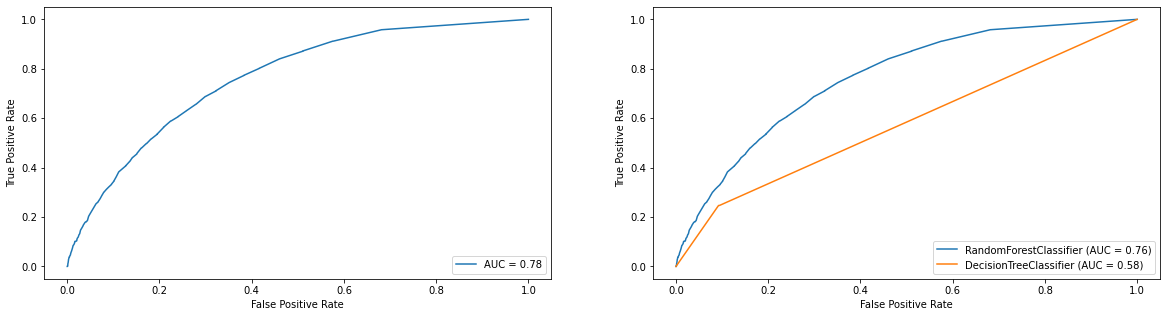

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

modelBart.fit(X_train_Distinction, y_train_Distinction)
modelDt.fit(X_train_Distinction, y_train_Distinction)
modelRf.fit(X_train_Distinction, y_train_Distinction)

distBartCurve = modelBart.predict(X_test_Distinction)
distDtCurve = modelDt.predict_proba(X_test_Distinction)[:, 1]
distRfCurve = modelRf.predict_proba(X_test_Distinction)[:, 1]

bartAUC = roc_auc_score(y_test_Distinction, distBartCurve)
DtAUC = roc_auc_score(y_test_Distinction, distDtCurve)
RfAUC = roc_auc_score(y_test_Distinction, distRfCurve)

bartFpr, bartTpr, _ = roc_curve(y_test_Distinction, distBartCurve)
DtFpr, DtTpr, _ = roc_curve(y_test_Distinction, distDtCurve)
RfFpr, RfTpr, _ = roc_curve(y_test_Distinction, distRfCurve)

ax[0].plot(RfFpr, RfTpr, label=f'AUC = {round(bartAUC, 2)}')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')


ax[1].plot(RfFpr, RfTpr, label=f'RandomForestClassifier (AUC = {round(RfAUC, 2)})')
ax[1].plot(DtFpr, DtTpr, label=f'DecisionTreeClassifier (AUC = {round(DtAUC, 2)})')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')
plt.show()

<h2><b>9. Veza između broja <i>klikova</i> i konačnog rezultata studenta</b></h2>

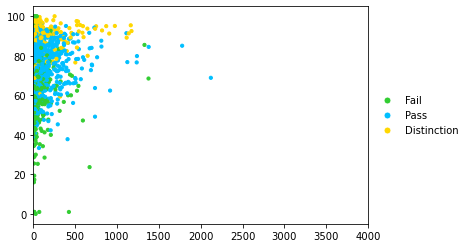

In [12]:
from matplotlib.lines import Line2D

avgStudentScore = studentAssessment.groupby('id_student', as_index = False).score.mean()
totalStudentClicks = studentVle.groupby('id_student', as_index=False).sum_click.sum()
relationshipTable = pd.merge(studentInfo, avgStudentScore, on='id_student', how='left')
relationshipTable = pd.merge(relationshipTable, clicks, on='id_student', how='left')
relationshipTable = relationshipTable[['id_student', 'final_result', 'sum_click', 'score']]
relationshipTable = relationshipTable[(relationshipTable['final_result'] != 'Withdrawn') ]
relationshipTable.dropna()

relationshipTable = relationshipTable.sample(n=2000, random_state = 55)

colors = {'Fail':'limegreen', 'Pass':'deepskyblue', 'Distinction':'gold'}
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='limegreen', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Pass',
                          markerfacecolor='deepskyblue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Distinction',
                          markerfacecolor='gold', markersize=7)]

plt.scatter(relationshipTable['sum_click'], relationshipTable['score'], c=relationshipTable['final_result'].map(colors), s = 10)
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim([0, 4000])
plt.show()